# Example code for searching for planets in the light curves of giants.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
import scipy.ndimage

Load the target file.

In [2]:
cvz = pd.read_csv("TICgiants_bright.csv", skiprows=4)
cvz.head()

ID   version       HIP           TYC        UCAC           TWOMASS  \
0  404718791  20190415  104165.0  5200-00455-1  423-135780  21061843-0532598   
1  404721928  20190415  104219.0  5192-01287-1  446-133776  21065234-0057481   
2  401777570  20190415  109686.0  9533-00753-1  018-007511  22130788-8628454   
3  437702027  20190415  109820.0  6378-00767-1  375-181482  22143719-1506062   
4  439806202  20190415  109761.0  5228-00475-1  427-123687  22135430-0438393   

   SDSS              ALLWISE                 GAIA      APASS  ...      e_RA  \
0   NaN  J210618.44-053259.8  6911917051573459328  4879213.0  ...  1.474792   
1   NaN  J210652.33-005748.3  2689035322734407552   686803.0  ...  1.718970   
2   NaN  J221307.83-862845.3  6342086770999561856        NaN  ...  1.493149   
3   NaN  J221437.18-150607.0  2599752642096501632        NaN  ...  1.296242   
4   NaN  J221354.33-043839.1  2626967749612137088  1120329.0  ...  1.348767   

      e_Dec     RA_orig   Dec_orig  e_RA_orig e_Dec_orig  raddflag  wdflag  \
0  1.363607  316.576841  -5.549971   0.046437   0.047213         1       0   
1  1.358650  316.718033  -0.963458   0.077356   0.048448         1       0   
2  0.981347  333.282756 -86.479239   0.032786   0.033141         1       0   
3  1.244250  333.654908 -15.102081   0.040457   0.040342         1       0   
4  1.200692  333.476438  -4.644206   0.046671   0.044628         1       0   

   ctlPriority       objID  
0     0.000490  1713025557  
1     0.000839  1713028661  
2     0.001748  1720609188  
3     0.000000  1720611196  
4     0.001229  1720611904  

[5 rows x 126 columns]

In [3]:
for k in cvz.keys():
    print(k)

ID
version
HIP
TYC
UCAC
TWOMASS
SDSS
ALLWISE
GAIA
APASS
KIC
objType
typeSrc
ra
dec
POSflag
pmRA
e_pmRA
pmDEC
e_pmDEC
PMflag
plx
e_plx
PARflag
gallong
gallat
eclong
eclat
Bmag
e_Bmag
Vmag
e_Vmag
umag
e_umag
gmag
e_gmag
rmag
e_rmag
imag
e_imag
zmag
e_zmag
Jmag
e_Jmag
Hmag
e_Hmag
Kmag
e_Kmag
TWOMflag
prox
w1mag
e_w1mag
w2mag
e_w2mag
w3mag
e_w3mag
w4mag
e_w4mag
GAIAmag
e_GAIAmag
Tmag
e_Tmag
TESSflag
SPFlag
Teff
e_Teff
logg
e_logg
MH
e_MH
rad
e_rad
mass
e_mass
rho
e_rho
lumclass
lum
e_lum
d
e_d
ebv
e_ebv
numcont
contratio
disposition
duplicate_id
priority
eneg_EBV
epos_EBV
EBVflag
eneg_Mass
epos_Mass
eneg_Rad
epos_Rad
eneg_rho
epos_rho
eneg_logg
epos_logg
eneg_lum
epos_lum
eneg_dist
epos_dist
distflag
eneg_Teff
epos_Teff
TeffFlag
gaiabp
e_gaiabp
gaiarp
e_gaiarp
gaiaqflag
starchareFlag
VmagFlag
BmagFlag
splists
e_RA
e_Dec
RA_orig
Dec_orig
e_RA_orig
e_Dec_orig
raddflag
wdflag
ctlPriority
objID


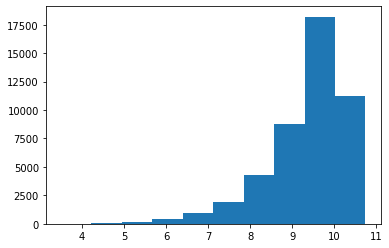

In [4]:
plt.hist(cvz.GAIAmag);

In [5]:
#start with brightest stars

brightcvz = cvz.GAIAmag < 6.5

print(len(cvz[brightcvz]))
    

727


fail:  389689344
fail:  197682684
fail:  160527775
fail:  125080827
fail:  305589829
fail:  62119727


fail:  280160125
fail:  6029884
fail:  152449405
fail:  2497082
fail:  179958960
fail:  155706950
fail:  125165048
fail:  48157646
fail:  71252848
fail:  14593975
fail:  313863987
fail:  145006683
fail:  340229490
fail:  449884234
fail:  47751300
fail:  292234186
fail:  441162150
fail:  374449129
fail:  214881104
fail:  158778489
fail:  372880279
fail:  368759
fail:  200226408
fail:  113583603
fail:  326358856
Inflating...
data found! for:  47381002


100%|██████████| 1245/1245 [00:20<00:00, 53.99it/s]


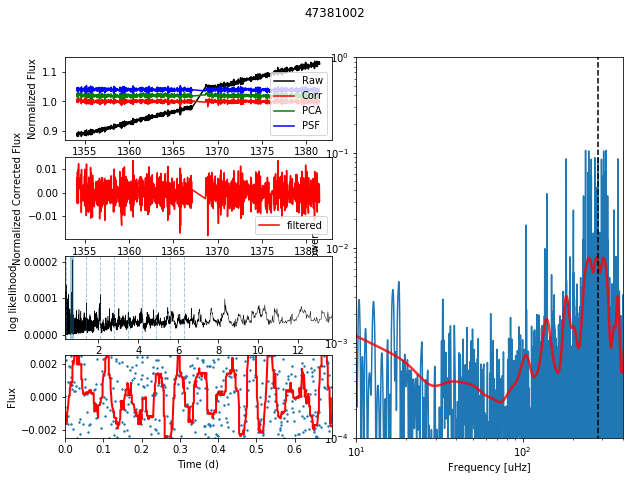

fail:  2471579
fail:  135371083
fail:  423528378
fail:  260751444


fail:  49194909
Inflating...
data found! for:  355425084


100%|██████████| 1245/1245 [00:16<00:00, 73.85it/s] 


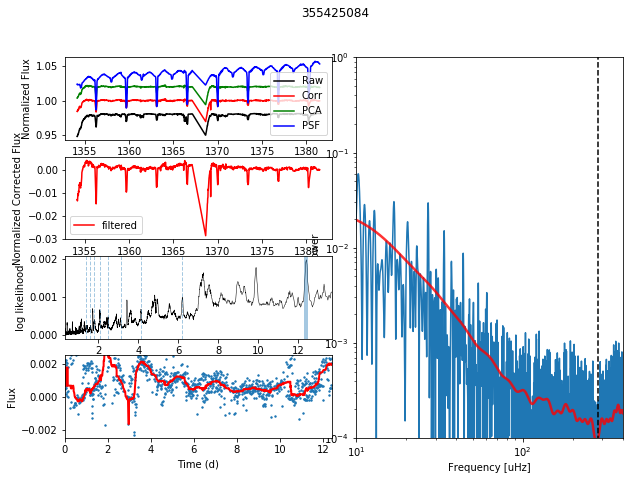

fail:  440865362
fail:  209971455
Inflating...
data found! for:  34035685


100%|██████████| 1245/1245 [00:17<00:00, 71.45it/s]


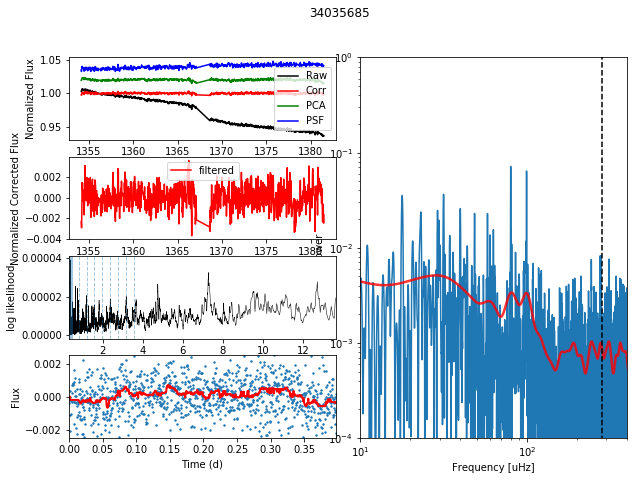

fail:  355653322
fail:  58487
fail:  241567772


fail:  185284200
fail:  383528582
fail:  175800228
Inflating...
data found! for:  66497441


100%|██████████| 1245/1245 [00:18<00:00, 67.03it/s]


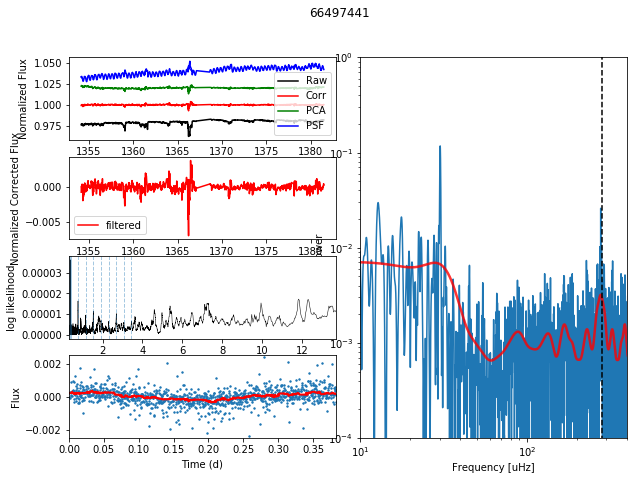

Inflating...
data found! for:  66533629


100%|██████████| 1245/1245 [00:18<00:00, 66.58it/s]


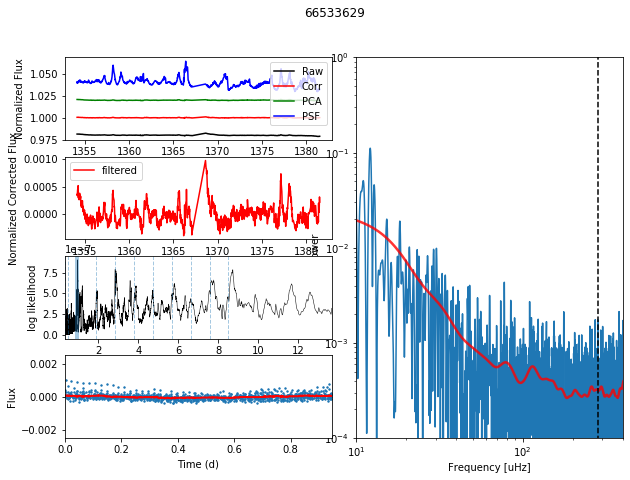

fail:  411034621
fail:  462110941
fail:  179486821
fail:  166563438
fail:  210514156
fail:  123717205
fail:  142596402
fail:  417526469
fail:  14648612
fail:  415118382
fail:  73806092
fail:  313836794
Inflating...
data found! for:  49529504


100%|██████████| 1245/1245 [00:16<00:00, 73.35it/s] 


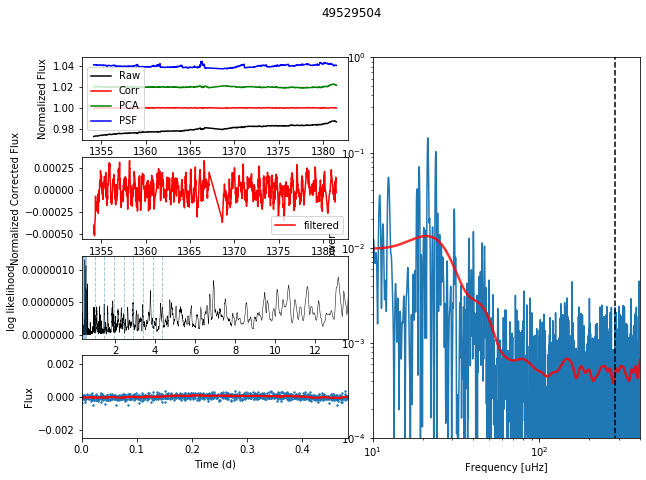

fail:  432437939
fail:  313942295
fail:  425572138
fail:  406116890
fail:  58619656
fail:  256086522
fail:  320809967
fail:  147113185
fail:  265435357
Inflating...
data found! for:  229062225


100%|██████████| 1245/1245 [00:17<00:00, 70.15it/s] 


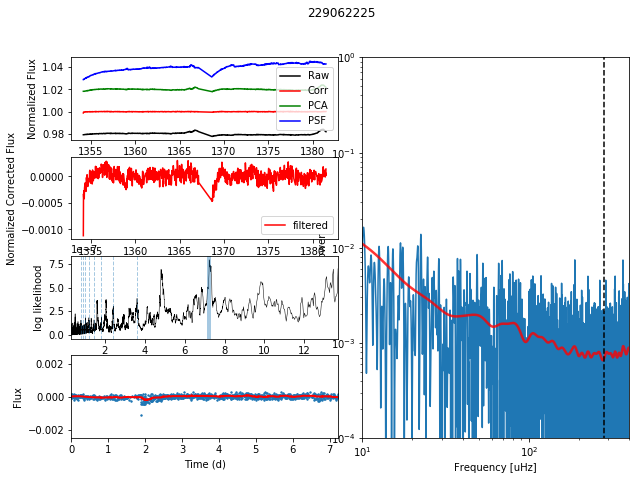

Inflating...
data found! for:  13065910


100%|██████████| 1245/1245 [00:17<00:00, 70.30it/s] 


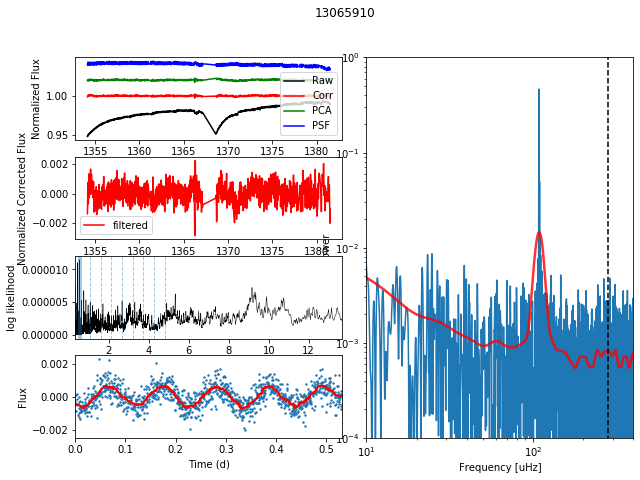

fail:  181862539
fail:  286910068
fail:  127528383


fail:  347827434
fail:  83229320
fail:  432204611
fail:  66715027
Inflating...
data found! for:  33912893


100%|██████████| 1245/1245 [00:17<00:00, 73.00it/s]


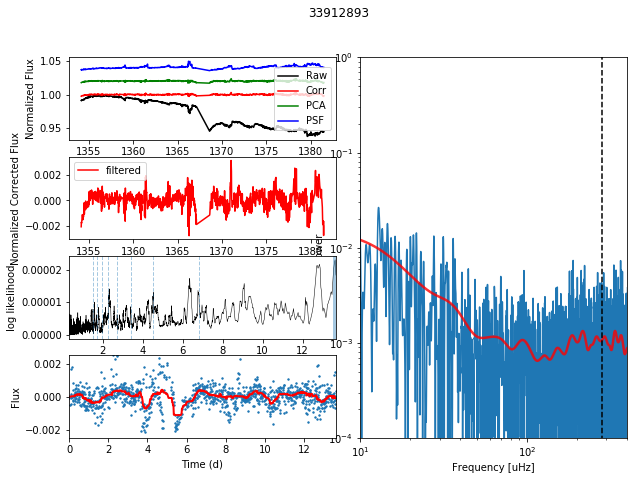

fail:  456061659


fail:  13318586
fail:  220466985
fail:  220531502
fail:  204411462
fail:  842202
fail:  122471322
fail:  38978965
fail:  16245795
fail:  17639611
fail:  422856892
fail:  442508593
fail:  306889170
fail:  108240432
fail:  111146604
fail:  331893210
fail:  12786746
fail:  48774605
fail:  168829745
fail:  389610795
fail:  159672173
fail:  36693463
Inflating...
data found! for:  204294043


100%|██████████| 1245/1245 [00:18<00:00, 69.09it/s]


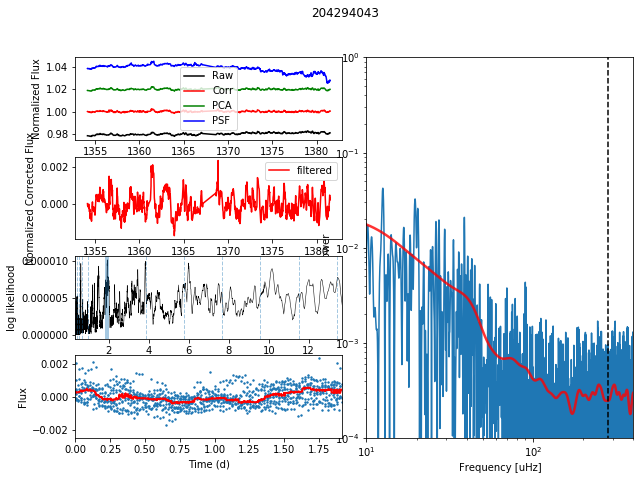

Inflating...
data found! for:  9108483


100%|██████████| 1245/1245 [00:16<00:00, 74.13it/s] 
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


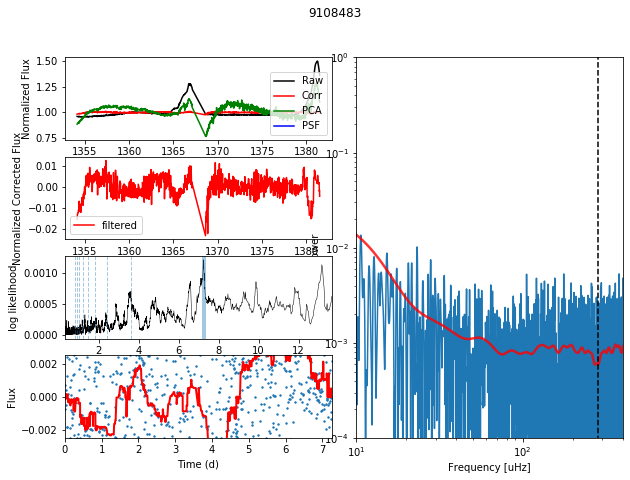

fail:  262841041
fail:  33987720
fail:  229680033
fail:  75540884
fail:  329488484
fail:  242530449
fail:  383173091
fail:  397712476


fail:  52694280
fail:  253996491
fail:  126006658
fail:  152958777
fail:  374343586
fail:  3944756
fail:  419666736
fail:  469933721
fail:  183828073
fail:  181862541
fail:  115015109
fail:  214299836
Inflating...
data found! for:  144276313


100%|██████████| 1245/1245 [00:20<00:00, 60.93it/s]


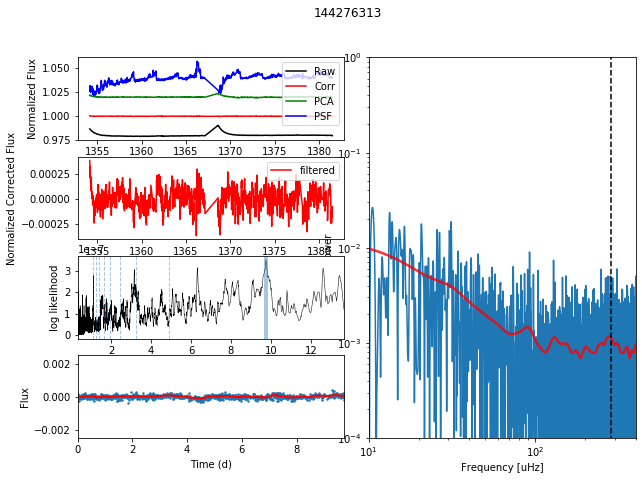

fail:  1523651762


fail:  187064019
fail:  73852746
fail:  77390459
fail:  83113252
fail:  453848870
fail:  207857392
fail:  94930840
fail:  269832851
fail:  327303945
Inflating...
data found! for:  441461100


100%|██████████| 1245/1245 [00:18<00:00, 66.48it/s]


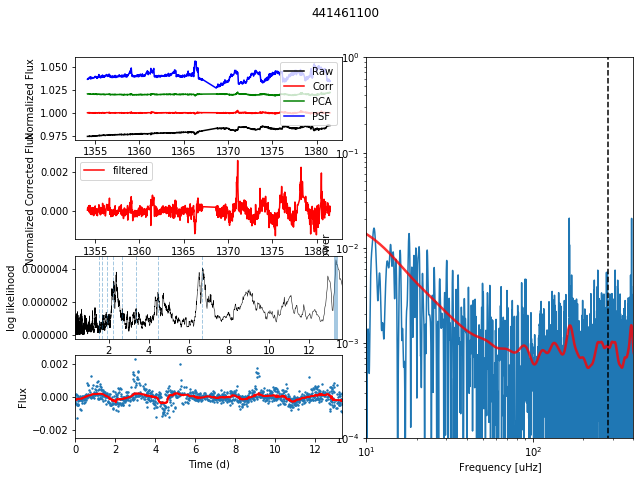

fail:  185556216
fail:  410273682
fail:  389658670
fail:  394004824
fail:  292422455
fail:  454802988
fail:  313942325


fail:  163730470
fail:  25302877
fail:  92253544
fail:  12785746
fail:  157862921
fail:  169807069
fail:  381628679
fail:  57717864
fail:  403910039
fail:  449083966
fail:  425591703
fail:  461313540
fail:  207215717
fail:  350466558
fail:  305325015
fail:  447579702
fail:  307153455
fail:  464344675
fail:  369458706
fail:  270499718
fail:  234282954
Inflating...
data found! for:  206649891


100%|██████████| 1245/1245 [00:17<00:00, 69.38it/s] 


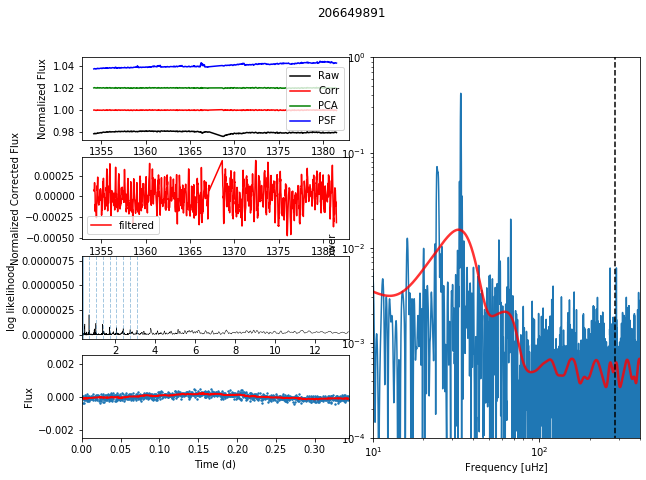

fail:  299755463


fail:  23959521
fail:  32876138
fail:  23963679
fail:  434513165
fail:  93927775
fail:  347465421
fail:  412559619
fail:  72121577
fail:  97673330
fail:  101588050
fail:  231693006
fail:  163975402
fail:  33063882
fail:  354944747
fail:  178956981
fail:  38272044
fail:  403121375
fail:  410422209
fail:  406507334
fail:  402517183
fail:  423719013
fail:  158158265
fail:  352289506
fail:  466231610
fail:  143127398
Inflating...
data found! for:  155316194


100%|██████████| 1245/1245 [00:19<00:00, 62.73it/s]


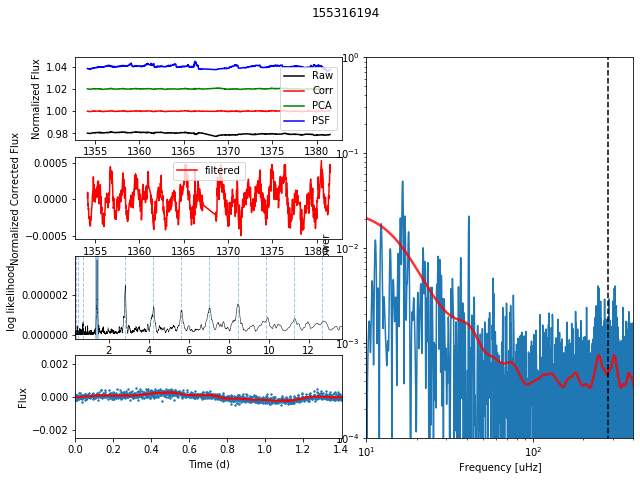

fail:  126702952
fail:  142328358


fail:  74745426
fail:  296688052
fail:  51750453
fail:  9921160
fail:  136915882
fail:  193505896
fail:  36705991
fail:  55111103
fail:  7999997
fail:  386614711
fail:  443589040
fail:  334895402
fail:  19924794
fail:  192680424
fail:  421698631
fail:  429674236
fail:  162499828
fail:  212712510
fail:  23913506
fail:  453858054
fail:  432192080
fail:  52106348
fail:  53612113
fail:  5529673
fail:  398361623
fail:  168381887
fail:  168384614
fail:  391798710
fail:  71834059
fail:  454443619
fail:  453689120
fail:  319809753
fail:  163450908
fail:  144395071
fail:  405091166
fail:  169468632
fail:  69983490
fail:  93155
fail:  99010
fail:  84028475
fail:  183921054
fail:  88562096
fail:  12056898
fail:  178709675
fail:  49068464
fail:  301005579
fail:  391873394
fail:  277227048
fail:  175739268
fail:  996707033
fail:  176867792
fail:  12515279
fail:  52108537
fail:  372651864
fail:  464459950
fail:  393855012
fail:  193195442
fail:  193222805
fail:  275379929
fail:  258314976
fail:  395

100%|██████████| 1245/1245 [00:20<00:00, 75.58it/s]


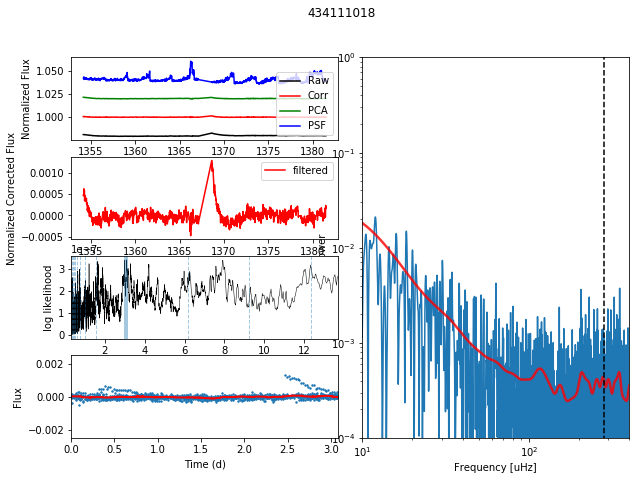

Inflating...
data found! for:  2056034502


100%|██████████| 1245/1245 [00:18<00:00, 66.15it/s]


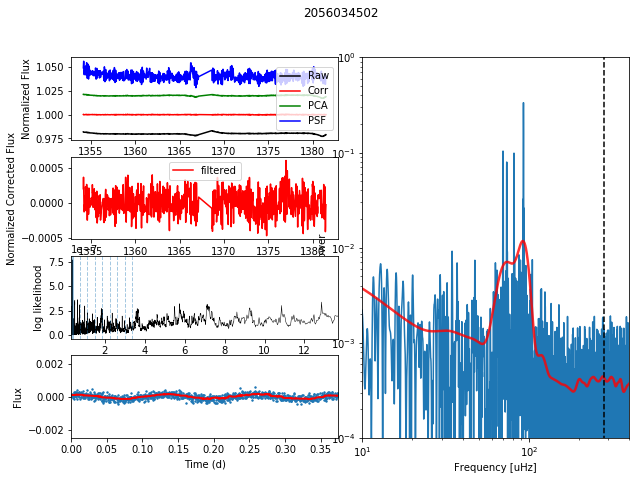

fail:  114721100
fail:  119362815
fail:  165909249
fail:  166236309
fail:  402805529
fail:  205960857
fail:  225188098
fail:  406119410
fail:  327594610
fail:  261526008
fail:  250958852
fail:  2055473775
fail:  173877131
fail:  340630839
fail:  411776522
fail:  447645421
fail:  424748146
fail:  290376803
Inflating...
data found! for:  2055570714


100%|██████████| 1245/1245 [00:18<00:00, 67.94it/s] 


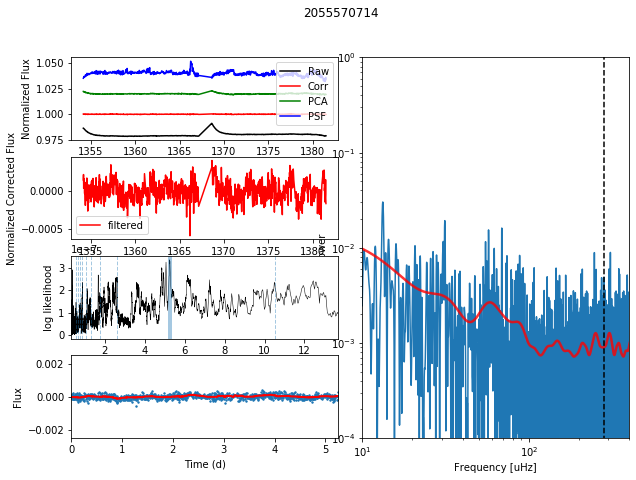

fail:  242072254
fail:  130869600
fail:  189745770
fail:  318249304
fail:  49549335
fail:  52957498
fail:  350856014
fail:  6670156
fail:  62184739
fail:  254079940
fail:  70442570
Inflating...
data found! for:  144301739


100%|██████████| 1245/1245 [00:21<00:00, 73.95it/s]


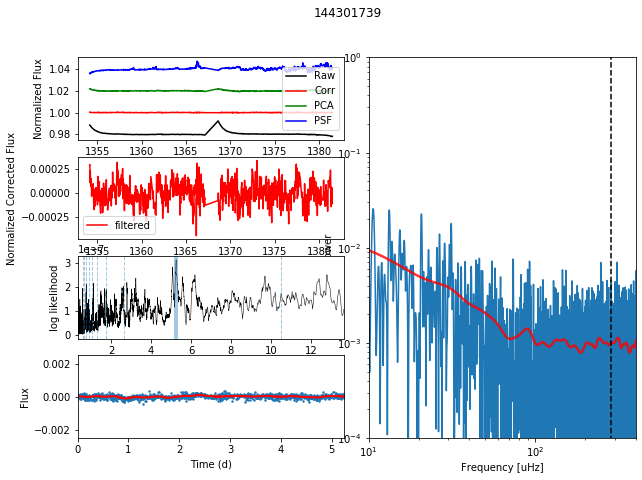

fail:  129560048


fail:  71983021
fail:  225849715
fail:  453750774
fail:  421660215
fail:  242288894
fail:  61447354
fail:  341029467
fail:  223684339
fail:  43680999
fail:  188530883
fail:  466087197
fail:  442402171
fail:  325862858
fail:  438832923
fail:  340963903
fail:  166310851
fail:  72850868
fail:  282326777
fail:  440927288
fail:  437327743
fail:  148898490
fail:  145740988
fail:  416166676
fail:  303696290
fail:  312274666
fail:  468184895
fail:  32199952
fail:  97402066
fail:  269153126
fail:  333077513
fail:  229804573
fail:  290401720
fail:  147755337
fail:  115010633
fail:  217030393
fail:  100701385
fail:  161522892
fail:  241056806
fail:  288550345
fail:  125097931
fail:  298275012
fail:  309797185
fail:  374343837
fail:  231665881
fail:  126803030
fail:  272482277
fail:  157635974
fail:  130722760
fail:  457386508
fail:  127092145
fail:  319647981
fail:  342230156
fail:  349804329
fail:  464420341
fail:  382151113
fail:  143463658
fail:  406237800
fail:  206536202
fail:  197686479
fai

100%|██████████| 1245/1245 [00:18<00:00, 92.61it/s] 


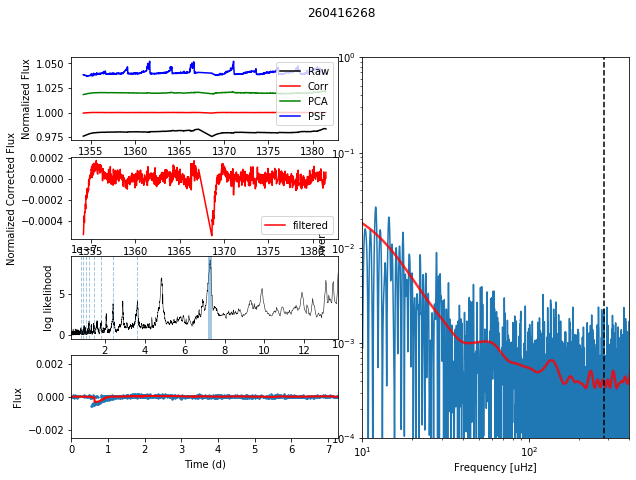

fail:  255570210
fail:  333042609
fail:  238137143
fail:  78816109
fail:  79215518
data found! for:  177075997


100%|██████████| 1245/1245 [00:17<00:00, 70.55it/s] 


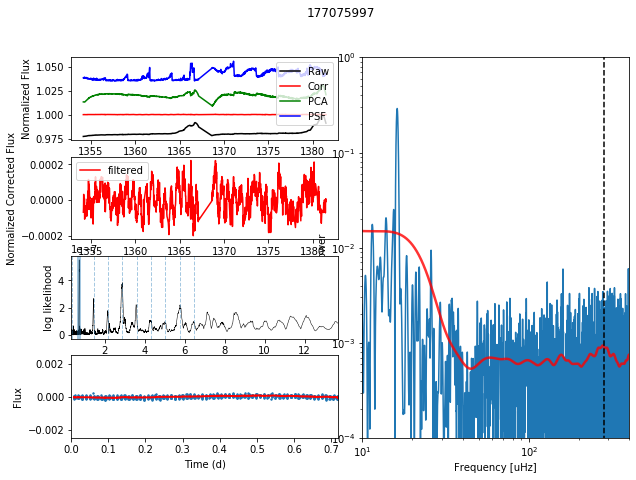

fail:  277982164
fail:  22600633
Inflating...
data found! for:  300015238


100%|██████████| 1245/1245 [00:25<00:00, 48.83it/s]


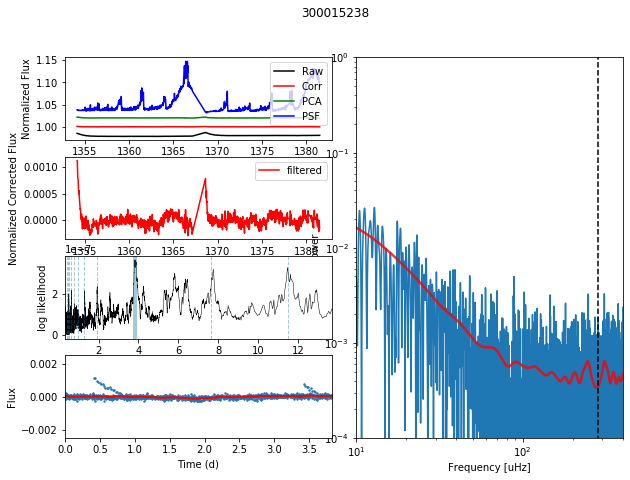

fail:  355275755
fail:  355406539
fail:  49832986
fail:  128057356
fail:  339769900


fail:  456871289
fail:  123699670
fail:  267603216
fail:  77550908
fail:  47089299
fail:  342063078
fail:  309146836
fail:  11068680
fail:  2226189
fail:  323292655
fail:  30906332
fail:  412955905
fail:  307458454
Inflating...
data found! for:  287638396


100%|██████████| 1245/1245 [00:14<00:00, 84.10it/s] 


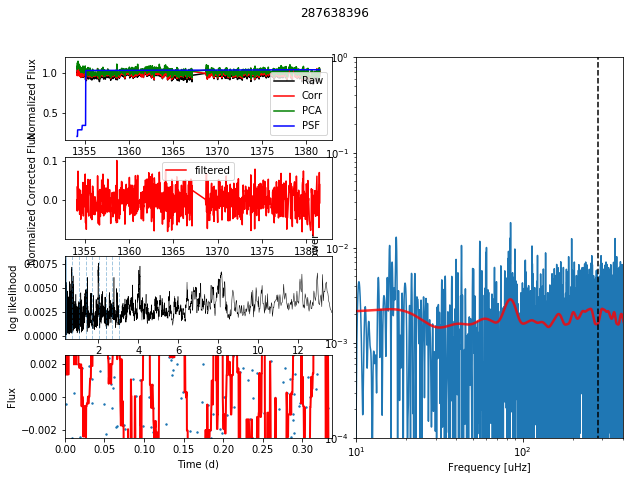

fail:  140349824
fail:  1261860
fail:  3296473
fail:  389012309
fail:  302134539
fail:  29874303
fail:  387176295
fail:  323816015
fail:  176848605
fail:  25060155
fail:  189476500
fail:  101395750
fail:  363237221
fail:  370960295
fail:  441226729
fail:  432130634
fail:  394279598
fail:  22234795
fail:  168160866
fail:  259761784
fail:  308986394
Inflating...
data found! for:  279360385


100%|██████████| 1245/1245 [00:18<00:00, 66.02it/s]


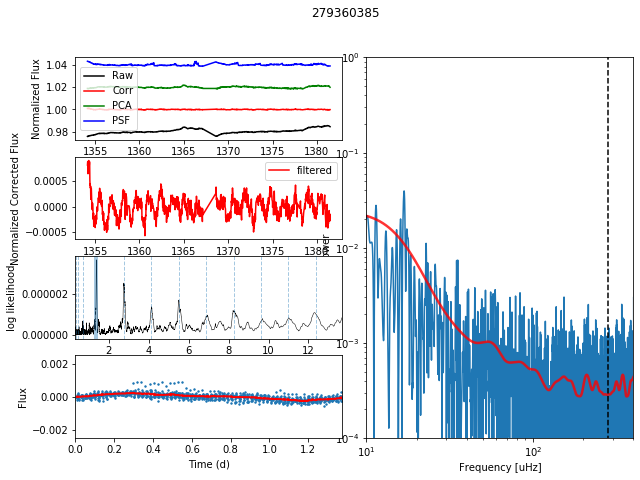

fail:  100205079
fail:  99150237
fail:  412736429
fail:  109564770
Inflating...
data found! for:  272427921


100%|██████████| 1245/1245 [00:19<00:00, 65.33it/s]


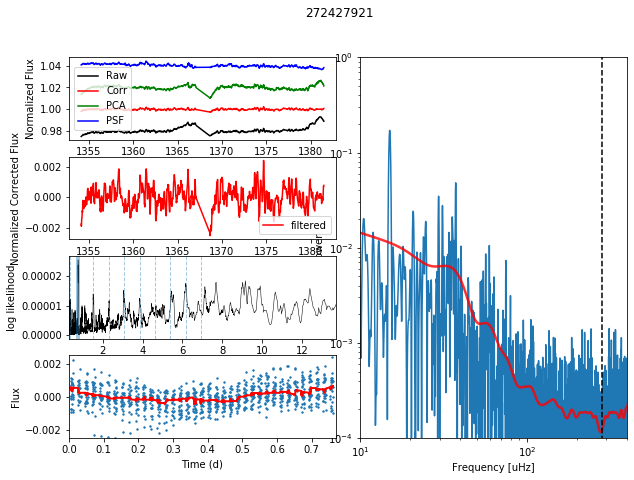

Inflating...
data found! for:  453099404


100%|██████████| 1245/1245 [00:18<00:00, 67.36it/s] 


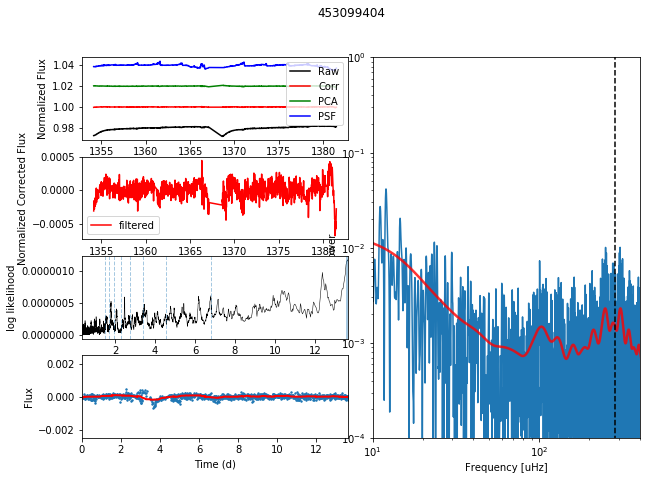

fail:  238283336
Inflating...
data found! for:  300865934


100%|██████████| 1245/1245 [00:17<00:00, 69.59it/s] 


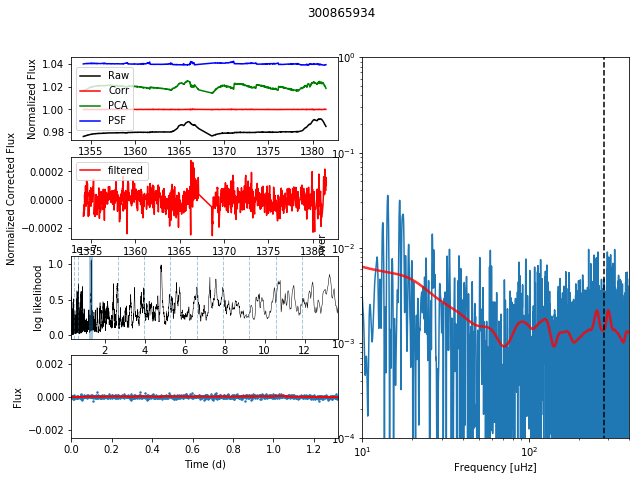

fail:  19676627
fail:  75047606
fail:  38151942
fail:  432825318
fail:  382959522
fail:  279996949
fail:  48520491
fail:  53745922
fail:  170411861
fail:  94123745
fail:  19566581
fail:  347355277
fail:  60658382
fail:  1038216
fail:  77549823
fail:  148131835
fail:  237408777
Inflating...
data found! for:  279159916


100%|██████████| 1245/1245 [00:20<00:00, 60.10it/s] 


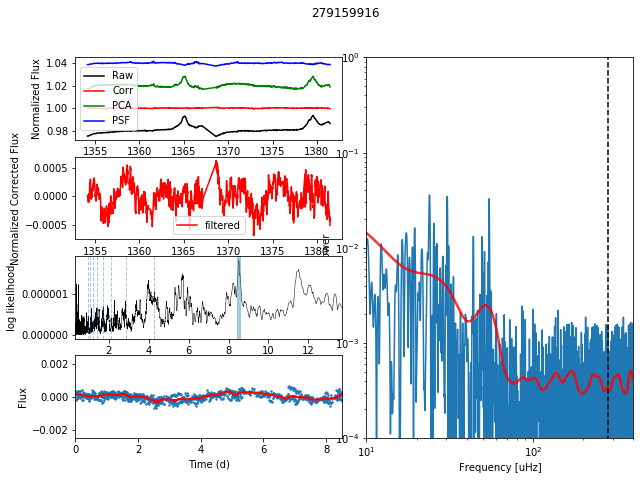

fail:  231461096
fail:  269566777
fail:  185755388
fail:  182220794
fail:  4422468
fail:  77850930
fail:  148096708
fail:  63475995
fail:  113662487
fail:  238622063
fail:  144361392
fail:  176607817
fail:  342503860
fail:  415501969
fail:  4847760
fail:  5622007
fail:  189621047
fail:  25321576
fail:  442654378
fail:  168976468
fail:  50758245
fail:  141595550
fail:  22083423
fail:  36876482
fail:  332800044
Inflating...
data found! for:  259902074


100%|██████████| 1245/1245 [00:20<00:00, 61.77it/s]


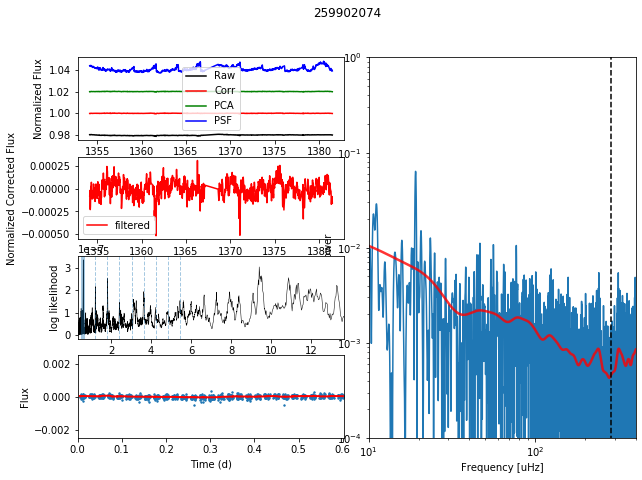

fail:  244203955
Inflating...
data found! for:  149542947


100%|██████████| 1245/1245 [00:21<00:00, 57.50it/s]


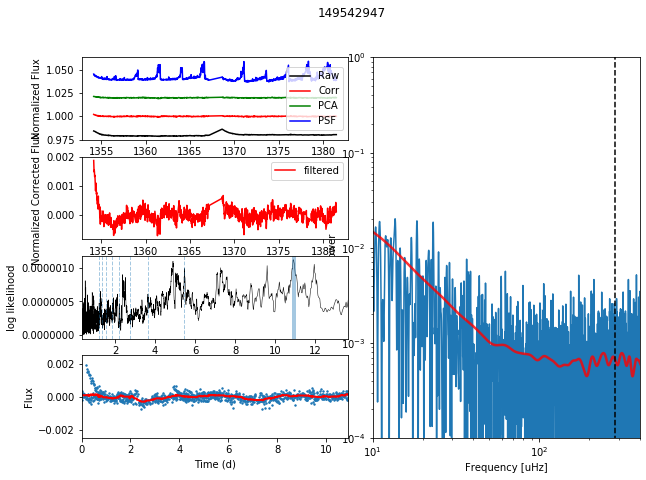

fail:  67265166
fail:  219155952
fail:  318017368
fail:  242250358
Inflating...
data found! for:  231272524


100%|██████████| 1245/1245 [00:19<00:00, 63.71it/s] 


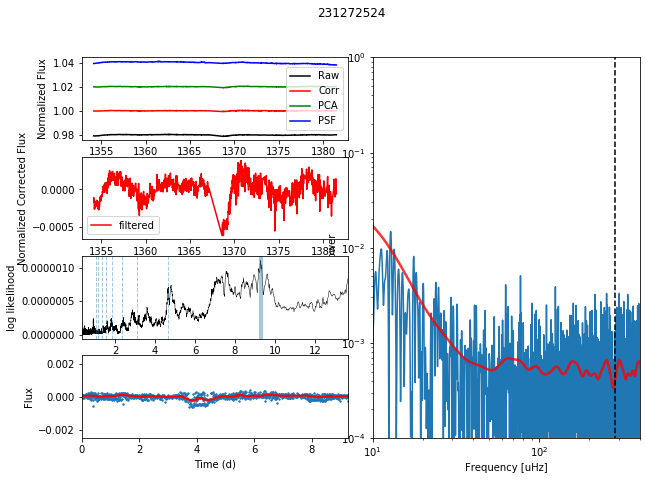

fail:  290751560
fail:  165152656
fail:  712984353
fail:  398704910
fail:  38471811
Inflating...
data found! for:  289592423


100%|██████████| 1245/1245 [00:18<00:00, 67.87it/s] 


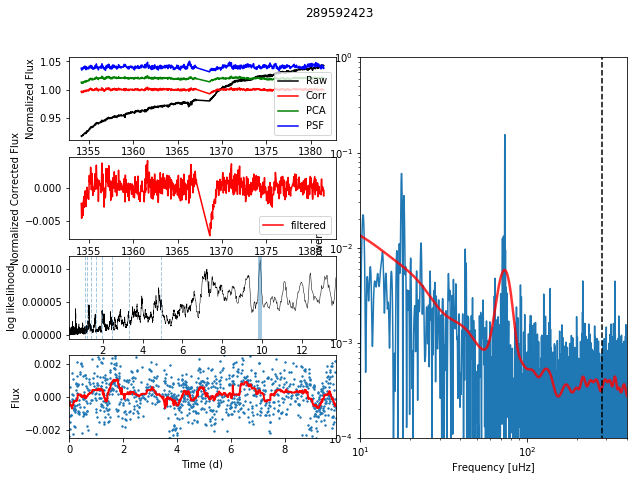

Inflating...
data found! for:  234500531


100%|██████████| 1245/1245 [00:18<00:00, 68.32it/s] 


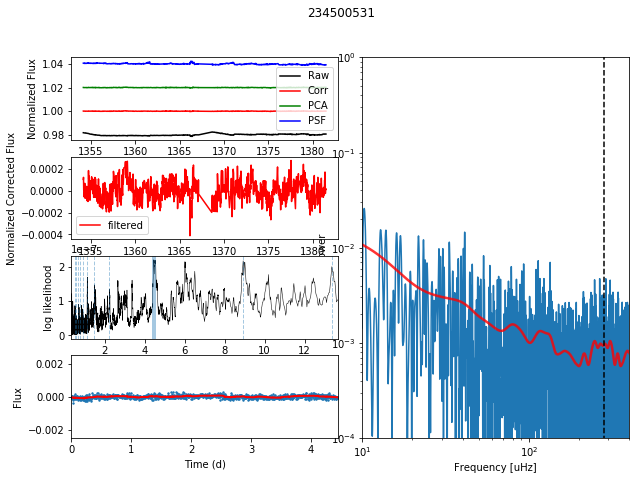

fail:  38847248
fail:  229099027
fail:  219239739
fail:  30960202
fail:  439466970
Inflating...
data found! for:  156084350


100%|██████████| 1245/1245 [00:17<00:00, 71.59it/s] 


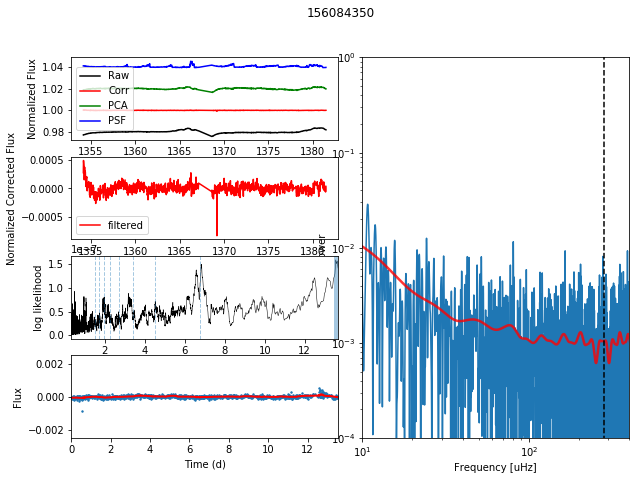

fail:  149861542
fail:  77231053


fail:  212959156
fail:  408048143
fail:  9967949
fail:  118034753
fail:  219420836
fail:  408118468
fail:  72310664
fail:  443024109
fail:  71865555
Inflating...
data found! for:  220414802


100%|██████████| 1245/1245 [00:19<00:00, 62.85it/s]


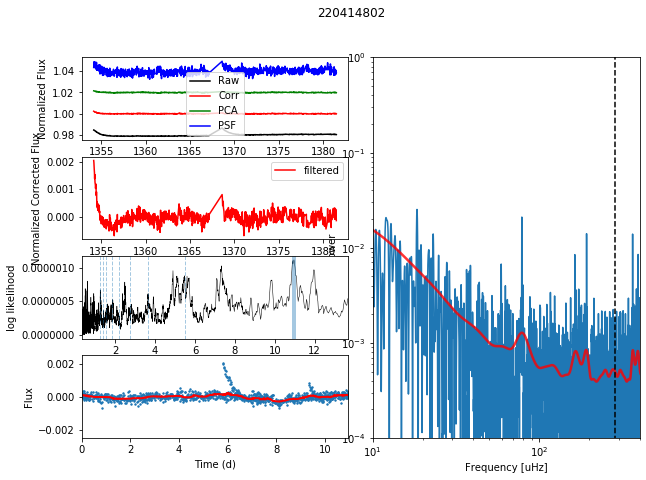

fail:  192787041
fail:  369381439
fail:  313940354
fail:  393385816
fail:  124079237
fail:  139409739
Inflating...
data found! for:  234518259


100%|██████████| 1245/1245 [00:18<00:00, 68.41it/s] 


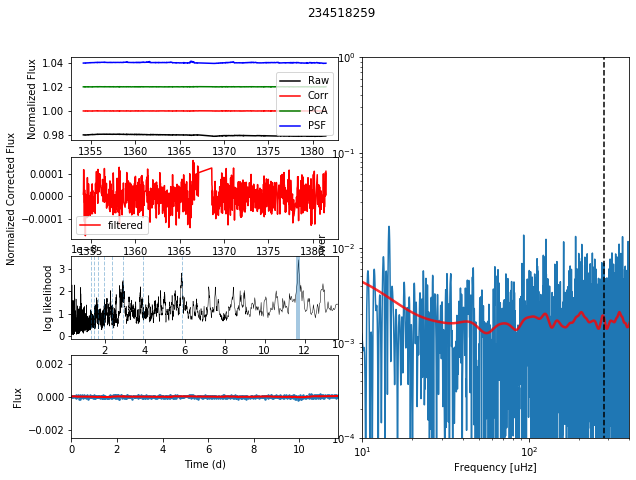

Inflating...
data found! for:  425907664


100%|██████████| 1245/1245 [00:19<00:00, 63.66it/s] 


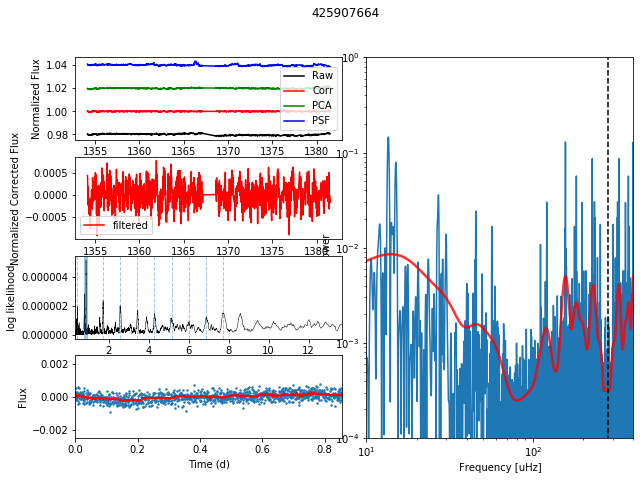

Inflating...
data found! for:  207085716


100%|██████████| 1245/1245 [00:18<00:00, 66.71it/s] 


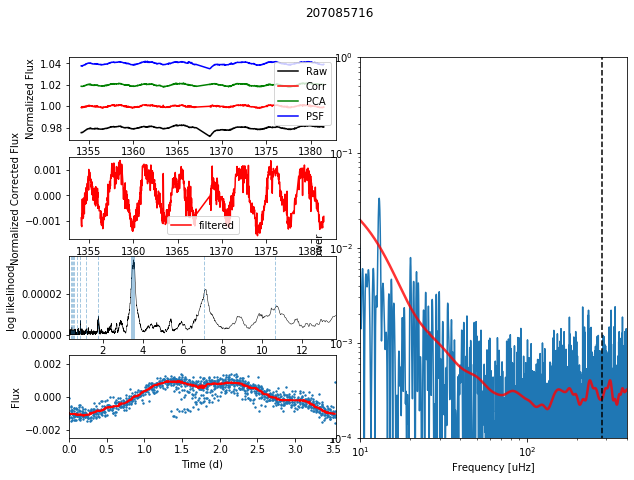

fail:  139576180
fail:  231916349
fail:  325708264
fail:  255630992


fail:  301345231
fail:  37077600
fail:  52042528
Inflating...
data found! for:  260640910


100%|██████████| 1245/1245 [00:18<00:00, 91.93it/s] 


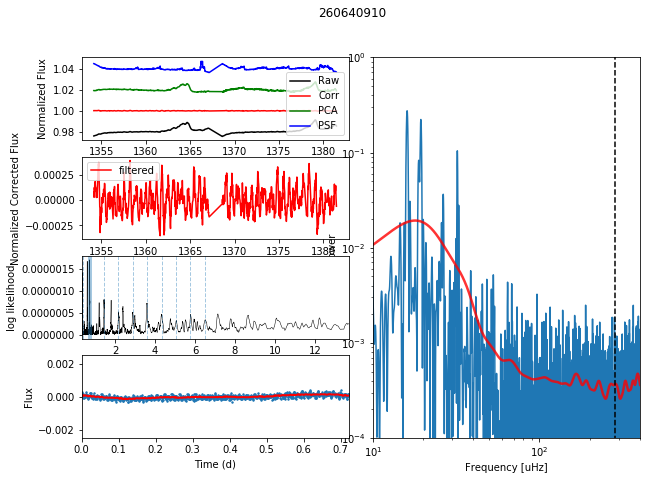

Inflating...
data found! for:  183595451


100%|██████████| 1245/1245 [00:19<00:00, 62.29it/s]


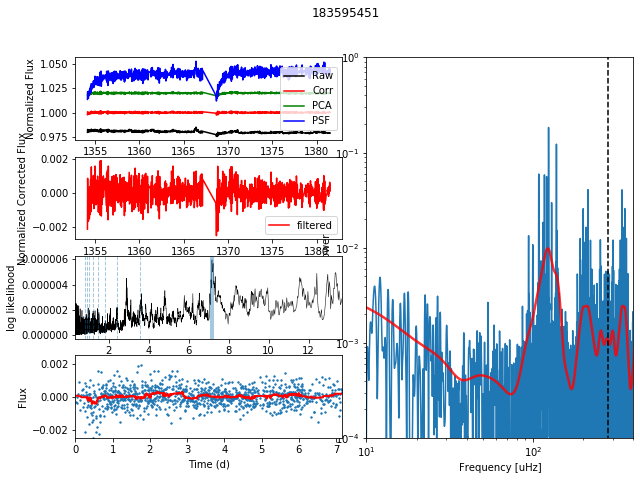

fail:  325691177
fail:  299315787
fail:  248383125
fail:  24978373
fail:  63788376
fail:  308244519
Inflating...
data found! for:  150437899


//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
//anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:376: RuntimeWarning: invalid value encountered in less_equal
  mask &= np.nan_to_num(np.abs(self.flux - np.nanmedian(self.flux))) <= (np.nanstd(self.flux) * sigma)
//anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
//anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


fail:  150437899
fail:  59846132
fail:  92984630
fail:  4353169
Inflating...
data found! for:  149250753


100%|██████████| 1245/1245 [00:19<00:00, 63.01it/s]


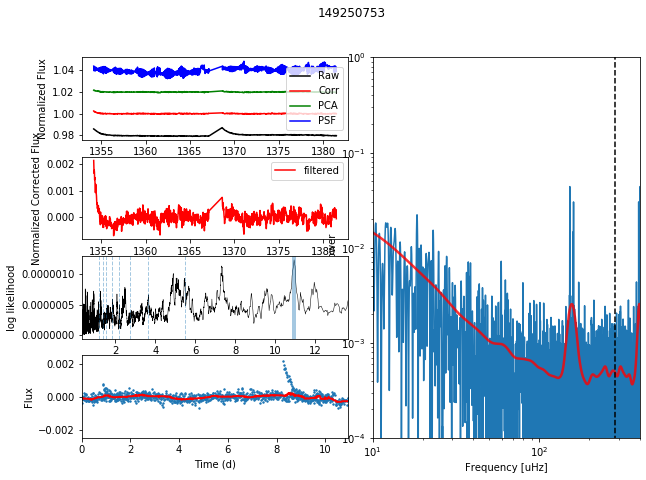

Inflating...
data found! for:  369666165


//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
//anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:376: RuntimeWarning: invalid value encountered in less_equal
  mask &= np.nan_to_num(np.abs(self.flux - np.nanmedian(self.flux))) <= (np.nanstd(self.flux) * sigma)
//anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
//anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


fail:  369666165
fail:  255752750
fail:  354552931
Inflating...
data found! for:  350295877


100%|██████████| 1245/1245 [00:26<00:00, 47.34it/s]


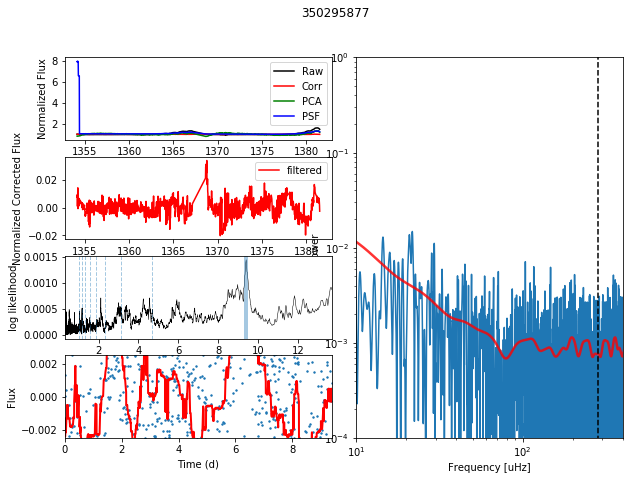

Inflating...
data found! for:  229158754


100%|██████████| 1245/1245 [00:19<00:00, 65.02it/s] 


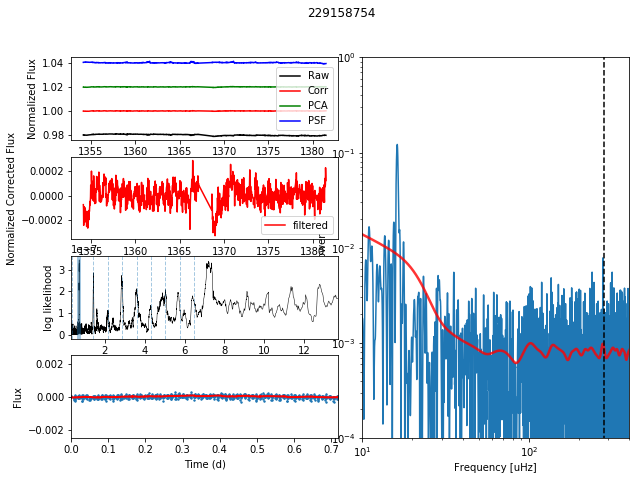

fail:  144482357
fail:  332892253
fail:  425177548
fail:  439900171
fail:  439902550
fail:  67265047
Inflating...
data found! for:  439397894


100%|██████████| 1245/1245 [00:22<00:00, 55.84it/s]


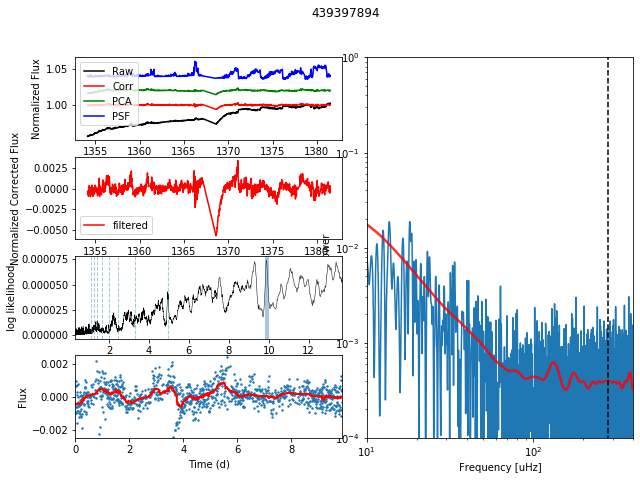

Inflating...
data found! for:  220559249


100%|██████████| 1245/1245 [00:21<00:00, 59.02it/s]


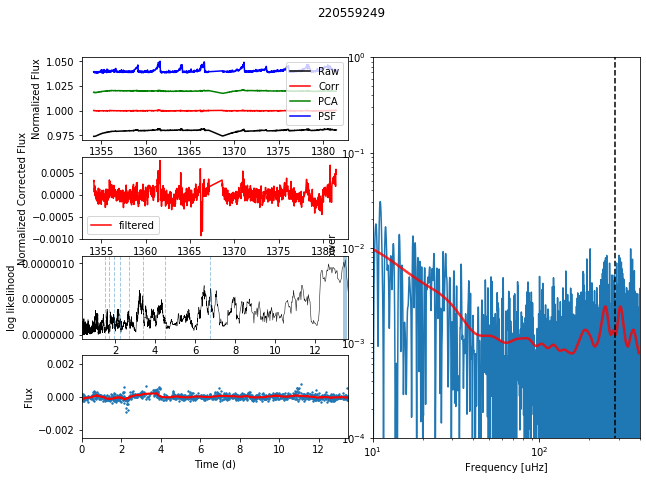

fail:  235070895
fail:  124229161
fail:  91638523
Inflating...
data found! for:  382473600


100%|██████████| 1245/1245 [00:18<00:00, 99.30it/s] 


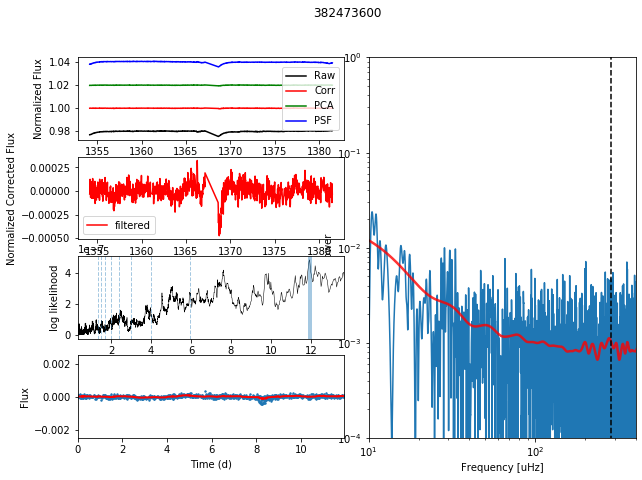

fail:  70489756
fail:  206491848
fail:  170632659
fail:  219197061
fail:  31092198
fail:  249028219
fail:  651236339
fail:  88571133
fail:  37817326
fail:  169382402
fail:  31378822
fail:  401913504
Inflating...
data found! for:  201884817


100%|██████████| 1245/1245 [00:21<00:00, 57.98it/s]


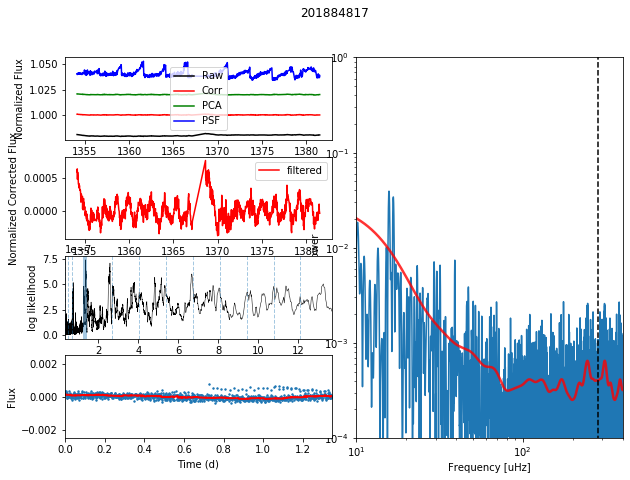

fail:  164682222
fail:  401912252
fail:  169553449
Inflating...
data found! for:  152087791


100%|██████████| 1245/1245 [00:19<00:00, 65.39it/s] 


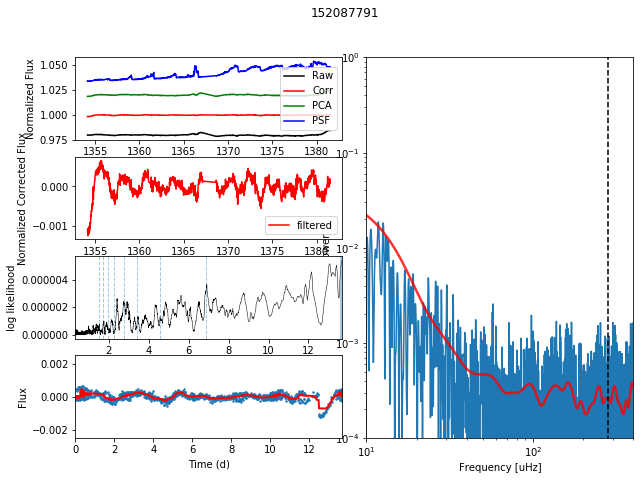

Inflating...
data found! for:  80474886


100%|██████████| 1245/1245 [00:19<00:00, 63.55it/s] 


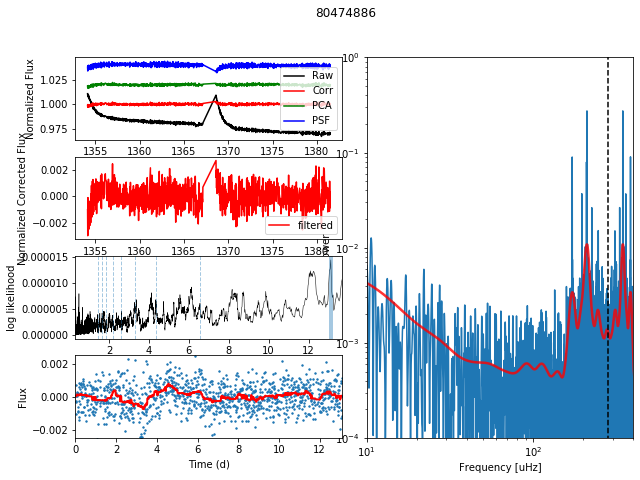

fail:  100908125
fail:  100918613
Inflating...
data found! for:  166787777


100%|██████████| 1245/1245 [00:19<00:00, 65.30it/s] 


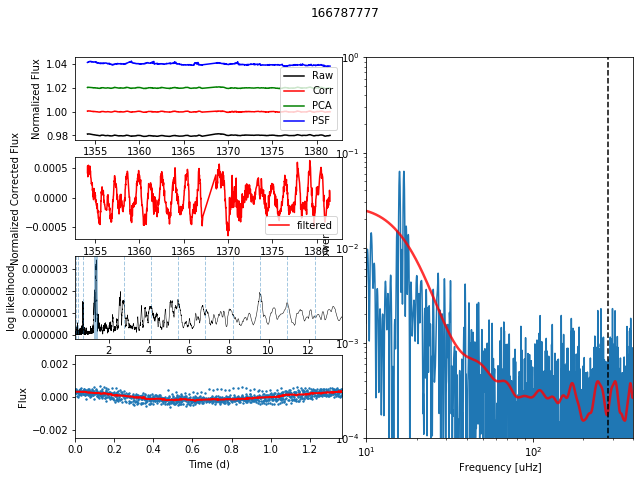

fail:  176780031
Inflating...
data found! for:  141026903


100%|██████████| 1245/1245 [00:21<00:00, 59.23it/s]


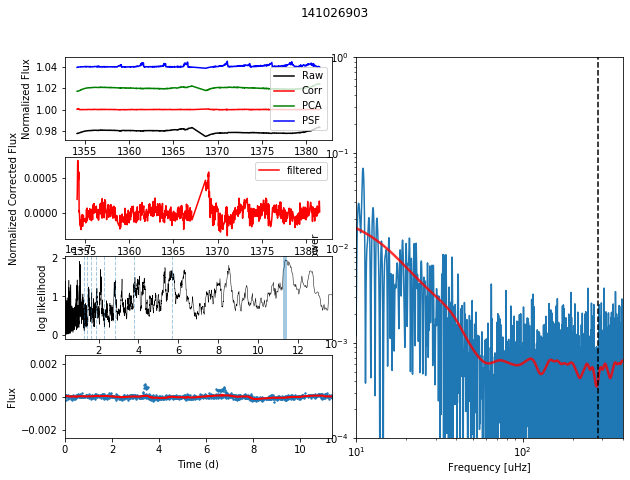

fail:  140286693
fail:  34084149
fail:  261748427
Inflating...
data found! for:  207149599


100%|██████████| 1245/1245 [00:21<00:00, 87.83it/s]


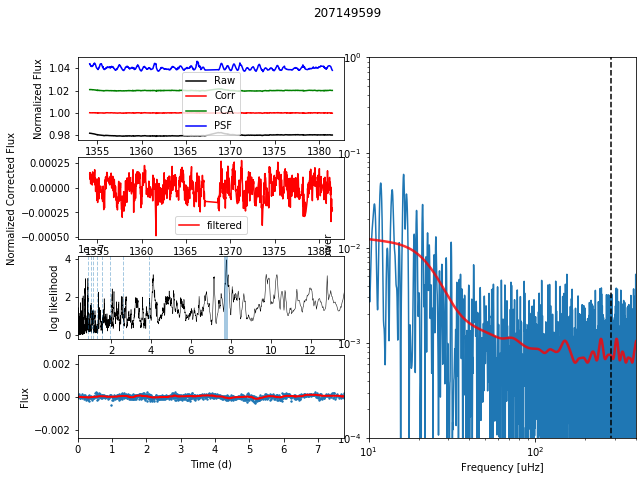

fail:  120932152
fail:  348762920


fail:  166932528
fail:  77669416
Inflating...
data found! for:  80430415


100%|██████████| 1245/1245 [00:19<00:00, 62.59it/s] 


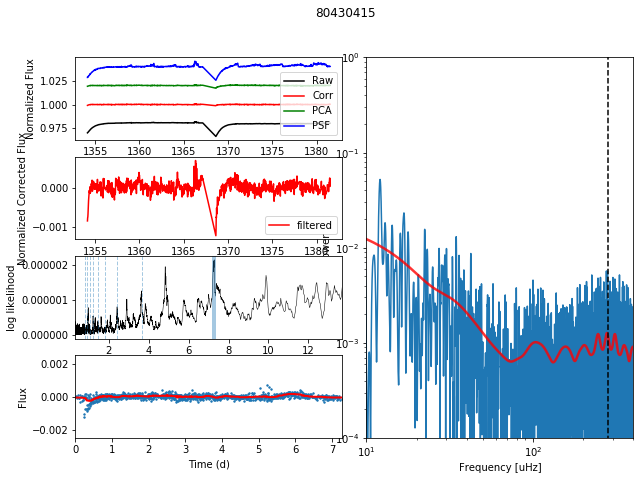

fail:  92230848
fail:  34041014
fail:  67687505
Inflating...
data found! for:  234498449


100%|██████████| 1245/1245 [00:22<00:00, 55.64it/s]


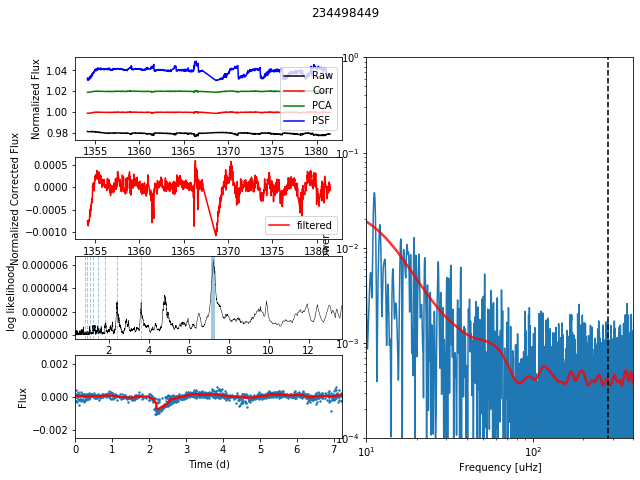

Inflating...
data found! for:  281703963


100%|██████████| 1245/1245 [00:22<00:00, 54.38it/s]


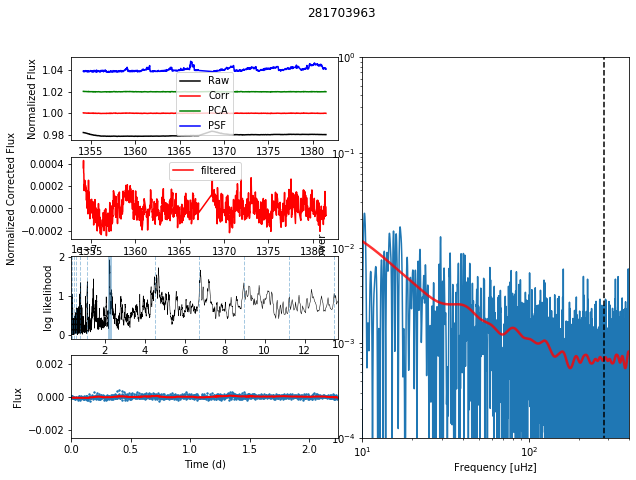

fail:  70525154
fail:  441133778
fail:  427544016
fail:  406478187
fail:  117774227
fail:  319291298
fail:  89094110
fail:  65452015
fail:  215480963
fail:  67545826
fail:  382582555
fail:  393031938
fail:  406500231
Inflating...
data found! for:  198004546


100%|██████████| 1245/1245 [00:19<00:00, 63.72it/s] 


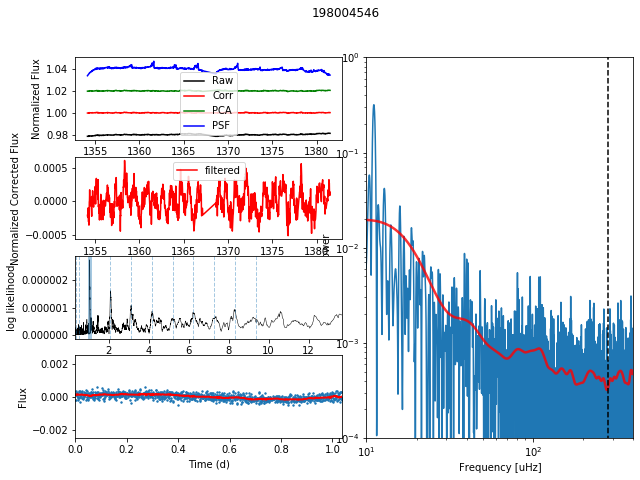

fail:  32500750
fail:  169396790
fail:  140288359
fail:  251058870
fail:  65291439
fail:  244255489
fail:  139595654
fail:  33418853
fail:  67629576
Inflating...
data found! for:  116157537


100%|██████████| 1245/1245 [00:22<00:00, 55.81it/s]


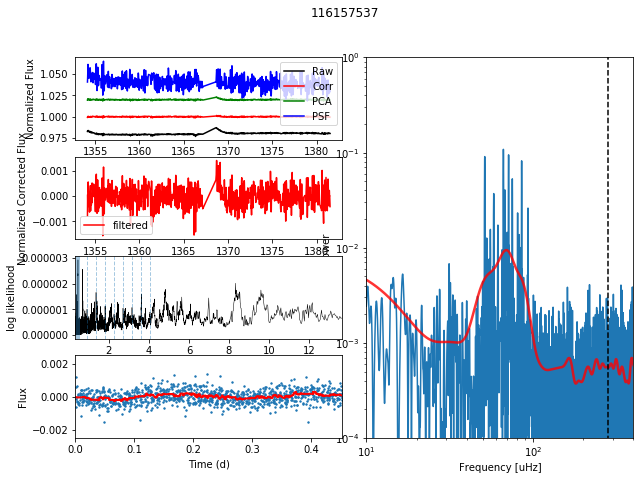

fail:  144504128
fail:  244253760


In [7]:
import eleanor
import astropy.stats as ass

def perday_to_uHz(freq_perday):
    return freq_perday/24/3600 * 1e6

def uHz_to_perday(freq_uHz):
    return (freq_uHz * 1e-6)*24*3600

freq = np.linspace(1./15, 1./.01, 100000)
# freq = np.linspace(uHz_to_perday(283), uHz_to_perday(1000), 100000)
ps = 1./freq

# star = eleanor.multi_sectors(tic=38846515, sectors=[1, 2, 3], tc=True)
# star = eleanor.multi_sectors(tic=cvz.ID.values[0], sectors=[1, 2, 3], tc=True)
# print(cvz.ID.values[0])
data = []

for i in range(len(cvz[brightcvz])):
    #print(i)
    try:
        #star = eleanor.multi_sectors('all', tic=cvz[brightcvz].ID.values[i], tc=True)
        star = eleanor.Source(tic=cvz[brightcvz].ID.values[i], sector=2, tc=True) #note: update to get all Sectors
        print('data found! for: ',cvz[brightcvz].ID.values[i])
        print(star)
        data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, try_load=True)
        print(data)
        
        #plot light curves
        plt.clf()
        plt.subplot2grid((4,4),(0,0),colspan=2)
        
        #plt.clf()
        #plt.figure(figsize=(15,5))
        #plt.suptitle(cvz[brightcvz].ID.values[i])

        q = data.quality == 0

        plt.plot(data.time[q], data.raw_flux[q]/np.median(data.raw_flux[q])-0.02, 'k', label="Raw")
        plt.plot(data.time[q], data.corr_flux[q]/np.median(data.corr_flux[q]), 'r', label="Corr")
        plt.plot(data.time[q], data.pca_flux[q]/np.median(data.pca_flux[q]) + 0.02, 'g', label="PCA")
        plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q]) + 0.04, 'b', label="PSF")

        plt.legend()
        plt.ylabel('Normalized Flux')
        plt.xlabel('Time')
        #plt.show()
        
        #plt.clf()
        #plt.figure(figsize=(15,5))
        #plt.suptitle(cvz[brightcvz].ID.values[i])
        #fig = plt.gcf()
        #fig.savefig(str(cvz[brightcvz].ID.values[i])+'_lc.png')
        
        #Lomb-Scargle periodogram
        
        time = data.time[q]
        flux = data.corr_flux[q]/np.median(data.corr_flux[q])-1 #NOTE: USING CORR FLUX
        flux = flux - scipy.ndimage.filters.gaussian_filter(flux, 100) #2-day (5muHz) filter
        #mask first 12h after momentum dump
        momdump = (time > 1339) * (time < 1341)
        time = time[~momdump]
        flux = flux[~momdump]
        
        flux_err = np.ones_like(flux) * 1e-5
        
        plt.subplot2grid((4,4),(1,0),colspan=2)
        
        plt.plot(time, flux, 'r', label="filtered")
        plt.legend()
        plt.ylabel('Normalized Corrected Flux')
        plt.xlabel('Time')

        #print(time,flux)
        
        power = ass.LombScargle(time, flux, flux_err).power(freq)
        
        plt.subplot2grid((4,4),(0,2),colspan=2,rowspan=4)
        #plt.clf()
        #plt.figure(figsize=(15,5))
        #plt.suptitle(cvz[brightcvz].ID.values[i])
        plt.loglog(freq/24/3600 * 1e6, power)
        plt.loglog(freq/24/3600 * 1e6, scipy.ndimage.filters.gaussian_filter(power, 500), color='r', alpha=0.8, lw=2.5)
        plt.axvline(283,-1,1, ls='--', color='k')
        plt.xlabel("Frequency [uHz]")
        plt.ylabel("Power")
        plt.xlim(10, 400)
        plt.ylim(1e-4, 1)
        #plt.show()
        #fig2 = plt.gcf()
        #fig2.savefig(str(cvz[brightcvz].ID.values[i])+'_fft.png')
        
        #BLS
        
        from astropy.stats import BoxLeastSquares

        model = BoxLeastSquares(time, flux)
        results = model.autopower(0.16)
        period = results.period[np.argmax(results.power)]

        plt.subplot2grid((4,4),(2,0),colspan=2)
        #plt.clf()
        #fig, ax = plt.subplots(1, 1, figsize=(15, 5))
        plt.plot(results.period, results.power, "k", lw=0.5)
        plt.xlim(results.period.min(), results.period.max())
        plt.xlabel("period [days]")
        plt.ylabel("log likelihood")

        # Highlight the harmonics of the peak period
        plt.axvline(period, alpha=0.4, lw=4)
        for n in range(2, 10):
            plt.axvline(n*period, alpha=0.4, lw=1, linestyle="dashed")
            plt.axvline(period / n, alpha=0.4, lw=1, linestyle="dashed")
        #plt.suptitle(cvz[brightcvz].ID.values[i])
        #plt.show()
        #fig3 = plt.gcf()
        #fig3.savefig(str(cvz[brightcvz].ID.values[i])+'_bls.png')
        
        #folded LC
        
        foldedtimes = time % (period)   
        foldtimesort = np.argsort(foldedtimes)
        foldfluxes = flux[foldtimesort]
        plt.subplot2grid((4,4),(3,0),colspan=2)
        #plt.clf()
        #plt.figure(figsize=(15,5))
        plt.scatter(foldedtimes, flux, s=2)
        plt.plot(np.sort(foldedtimes), scipy.ndimage.filters.median_filter(foldfluxes,40), lw=2, color='r')
        #plt.axvline(x=transitepoch, color='k', ls='--', zorder=0, lw=3.5, alpha=0.5) #best_per[i]
        plt.xlabel('Time (d)')
        plt.ylabel('Flux')
        plt.xlim(0,period)
        plt.ylim(-0.0025,0.0025)
        #plt.show()
        plt.suptitle(cvz[brightcvz].ID.values[i])
        fig = plt.gcf()
        fig.set_size_inches(10,7)
        fig.savefig(str(cvz[brightcvz].ID.values[i])+'_quicklook.png')
        plt.show()        
    except:
        print("fail: ",cvz[brightcvz].ID.values[i])
        
        
# star = eleanor.Source(tic=cvz.ID.values[25], sector=1, tc=True)
# data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

Text(0.5, 0, 'Time')

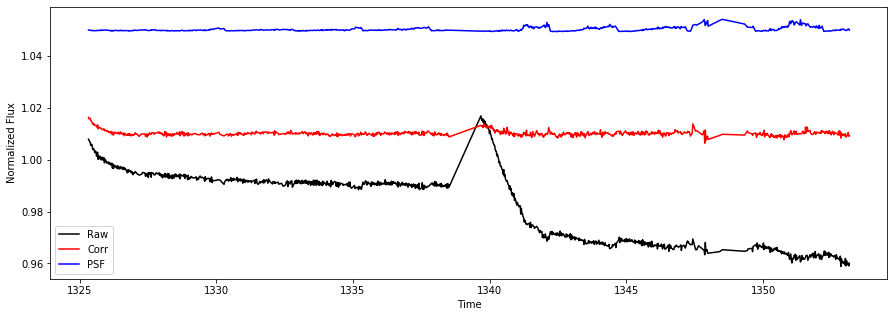

In [8]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.median(data.raw_flux[q])-0.01, 'k', label="Raw")
plt.plot(data.time[q], data.corr_flux[q]/np.median(data.corr_flux[q]) + 0.01, 'r', label="Corr")
plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q]) + 0.05, 'b', label="PSF")

plt.legend()
plt.ylabel('Normalized Flux')
plt.xlabel('Time')

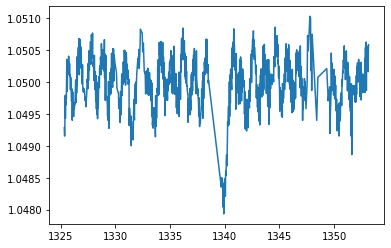

In [7]:
plt.plot(data.time[q], data.pca_flux[q]/np.median(data.pca_flux[q]) + 0.05, label="PCA")
#plt.xlim(1340,1341)

[1325.32700229 1325.34787622 1325.36868911 ... 1353.11813611 1353.13894893
 1353.15976174] [ 0.00335407  0.00296404  0.00287293 ...  0.00052907 -0.00068324
 -0.00055507]


(0.0001, 1)

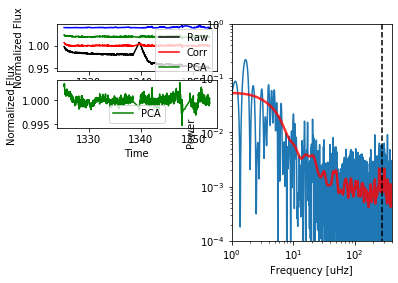

In [14]:
plt.clf()
plt.subplot2grid((4,4),(0,0),colspan=2)

#plt.clf()
#plt.figure(figsize=(15,5))
#plt.suptitle(cvz[brightcvz].ID.values[i])

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.median(data.raw_flux[q])-0.02, 'k', label="Raw")
plt.plot(data.time[q], data.corr_flux[q]/np.median(data.corr_flux[q]), 'r', label="Corr")
plt.plot(data.time[q], data.pca_flux[q]/np.median(data.pca_flux[q]) + 0.02, 'g', label="PCA")
plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q]) + 0.04, 'b', label="PSF")

plt.legend()
plt.ylabel('Normalized Flux')
plt.xlabel('Time')
#plt.show()

#plt.clf()
#plt.figure(figsize=(15,5))
#plt.suptitle(cvz[brightcvz].ID.values[i])
plt.subplot2grid((4,4),(1,0),colspan=2)

plt.plot(data.time[q], data.pca_flux[q]/np.median(data.pca_flux[q]), 'g', label="PCA")
plt.legend()
plt.ylabel('Normalized Flux')
plt.xlabel('Time')
#fig = plt.gcf()
#fig.savefig(str(cvz[brightcvz].ID.values[i])+'_lc.png')


time = data.time[q]
flux = data.pca_flux[q]/np.median(data.pca_flux[q])-1 #NOTE: USING PCA FLUX
flux_err = np.ones_like(flux) * 1e-5

print(time,flux)

power = ass.LombScargle(time, flux, flux_err).power(freq)

plt.subplot2grid((4,4),(0,2),colspan=2,rowspan=4)
#plt.clf()
#plt.figure(figsize=(15,5))
#plt.suptitle(cvz[brightcvz].ID.values[i])
plt.loglog(freq/24/3600 * 1e6, power)
plt.loglog(freq/24/3600 * 1e6, scipy.ndimage.filters.gaussian_filter(power, 150), color='r', alpha=0.8, lw=2.5)
plt.axvline(283,-1,1, ls='--', color='k')
plt.xlabel("Frequency [uHz]")
plt.ylabel("Power")
plt.xlim(1, 400)
plt.ylim(1e-4, 1)
#plt.show()
#fig2 = plt.gcf()
#fig2.savefig(str(cvz[brightcvz].ID.values[i])+'_fft.png')

#BLS